### Задание №1.
Решите линейную систему:

$\normalsize \begin{bmatrix}1&2&3\\4&0&6\\7&8&9\end{bmatrix}\cdot X = \begin{bmatrix}12\\2\\1\end{bmatrix}$

__Решение:__

In [1]:
import numpy as np

In [2]:
A = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]])
B = np.array([12, 2, 1])
np.linalg.solve(A, B)

array([-9.2       ,  0.9       ,  6.46666667])

__Ответ:__ -9.2, 0.9, 6.467
___

### Задание №2.
Найдите псевдорешение:

$\normalsize \begin{cases}x+2y-z=1\\3x-4y=7\\8x-5y+2z=12\\2x-5z=7\\11x+4y-7z=15\end{cases}$

__Решение:__   
Матричный вид:

$\normalsize \begin{bmatrix}1&2&-1\\3&-4&0\\8&-5&2\\2&0&-5\\11&4&-7\end{bmatrix}\cdot X = \begin{bmatrix}1\\7\\12\\7\\15\end{bmatrix}$


In [3]:
A = np.array([[1, 2, -1], [3, -4, 0], [8, -5, 2], [2, 0, -5], [11, 4, -7]])
B = np.array([1, 7, 12, 7, 15])
np.linalg.lstsq(A, B)[0]

<ipython-input-3-504db03cb401>:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.linalg.lstsq(A, B)[0]


array([ 1.13919353, -0.90498444, -0.9009803 ])

__Ответ:__ 1.139, -0.905, -0.901
___

### Задание №3.
Сколько решений имеет линейная система:

$\normalsize \begin{bmatrix}1&2&3\\4&5&6\\7&8&9\end{bmatrix}\cdot X = \begin{bmatrix}12\\2\\1\end{bmatrix}$

Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее. 

__Решение:__

Найдем и сравним ранги матрицы А и расширенной матрицы:

In [4]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([[12, 2, 1]])
A_ext = np.concatenate((A, B.T), axis=1)

In [5]:
np.linalg.matrix_rank(A), np.linalg.matrix_rank(A_ext)

(2, 3)

Так как ранг матрицы А меньше числа неизвестных, и он также меньше ранга расширенной матрицы, следовательно система не имеет решений.   
Система будет иметь бесконечное количество решений, если вектор В поменять на (2, 5, 8).

In [6]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([[2, 5, 8]])
A_ext = np.concatenate((A, B.T), axis=1)
np.linalg.matrix_rank(A), np.linalg.matrix_rank(A_ext)

(2, 2)

___
### Задание №4.
Вычислите LU-разложение матрицы:

$\normalsize \begin{bmatrix}1&2&3\\2&16&21\\4&28&73\end{bmatrix}$

__Решение:__

In [7]:
import scipy.linalg

In [8]:
A = np.array([[1, 2, 3], [2, 16, 21], [4, 28, 73]])
P, L, U = scipy.linalg.lu(A)
P, L, U

(array([[0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.]]),
 array([[ 1.  ,  0.  ,  0.  ],
        [ 0.25,  1.  ,  0.  ],
        [ 0.5 , -0.4 ,  1.  ]]),
 array([[  4.  ,  28.  ,  73.  ],
        [  0.  ,  -5.  , -15.25],
        [  0.  ,   0.  , -21.6 ]]))

$\normalsize \begin{bmatrix}1&2&3\\2&16&21\\4&28&73\end{bmatrix} = \begin{bmatrix}0&1&0\\0&0&1\\1&0&0\end{bmatrix} \cdot \begin{bmatrix}1&0&0\\0.25&1&0\\0.5&-0.4&1\end{bmatrix} \cdot \begin{bmatrix}4&28&73\\0&-5&-15.25\\0&0&-21.6\end{bmatrix}$

При B = $\normalsize \begin{bmatrix}14\\97\\279\end{bmatrix}$:

In [9]:
B = np.array([14, 97, 279])
np.linalg.solve(A, B)

array([1., 2., 3.])

X = $\normalsize \begin{bmatrix}1\\2\\3\end{bmatrix}$
___

### Задание №5.
Найдите нормальное псевдорешение недоопределенной системы:

$\normalsize \begin{cases}x+2y-z=1\\8x-5y+2z=12\end{cases}$

Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум.

__Решение:__   


In [10]:
from matplotlib import pyplot as plt
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

In [11]:
def Q(x, y, z):
    return np.sqrt(x**2 + y**2 + z**2)

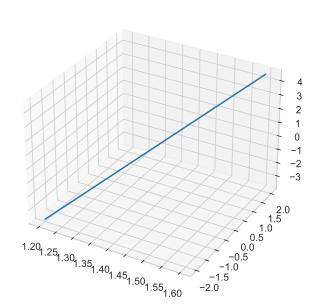

In [12]:
fig = figure()
ax = Axes3D(fig)
X = np.arange(1.2, 1.6, 0.005)
Y = 10*X - 14
Z = X + 2*Y - 1
ax.plot(X, Y, Z)
show()

Text(0, 0.5, 'Q(x,y,z)')

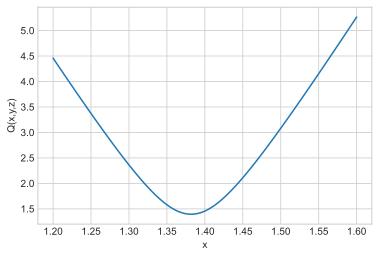

In [13]:
plt.plot(X, Q(X, Y, Z))
plt.xlabel('x')
plt.ylabel('Q(x,y,z)')

In [14]:
A = np.array([[1, 2, -1], [8, -5, 2]])
B = np.array([1, 12])
np.linalg.lstsq(A, B)

<ipython-input-14-d93be9187394>:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.linalg.lstsq(A, B)


(array([ 1.38191882, -0.18081181,  0.0202952 ]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

__Ответ:__ 1.382, -0.181, 0.02
___

### Задание №6.
Найдите одно из псевдорешений вырожденной системы:

$\normalsize \begin{bmatrix}1&2&3\\4&5&6\\7&8&9\end{bmatrix}\cdot X = \begin{bmatrix}2\\5\\11\end{bmatrix}$

Попробуйте также отыскать и нормальное псевдорешение.

__Решение:__

In [15]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([2, 5, 11])
Q, R = np.linalg.qr(A)
Q, R

(array([[-0.12309149,  0.90453403,  0.40824829],
        [-0.49236596,  0.30151134, -0.81649658],
        [-0.86164044, -0.30151134,  0.40824829]]),
 array([[-8.12403840e+00, -9.60113630e+00, -1.10782342e+01],
        [ 0.00000000e+00,  9.04534034e-01,  1.80906807e+00],
        [ 0.00000000e+00,  0.00000000e+00, -1.11164740e-15]]))

In [16]:
R1 = R[:2, :2]
B1 = B[:2]
R1, B1

(array([[-8.1240384 , -9.6011363 ],
        [ 0.        ,  0.90453403]]),
 array([2, 5]))

In [17]:
np.linalg.solve(R1, B1)

array([-6.77892878,  5.52770798])

__Ответ:__ одно из псевдорешений: (-6.779, 5.528, 0)